In [39]:
!pip install opendatasets

In [40]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation/download?datasetVersionNumber=1")

Skipping, found downloaded files in "./bank-customer-segmentation" (use force=True to force download)


In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

df = pd.read_csv("/content/bank-customer-segmentation/bank_transactions.csv")
df



,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [42]:
print(df.shape)
df.isna().sum()

(1048567, 9)


TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [43]:
df = df.dropna()
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [44]:
unique_values_count = df['CustLocation'].nunique()
print(unique_values_count)
df=df.drop('TransactionTime', axis=1)
codes, unique = pd.factorize(df['CustLocation'])
df.drop('CustLocation', axis=1, inplace=True)
df['CustLocation'] = codes
df

9275


,TransactionID,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustLocation
0,T1,C5841053,10/1/94,F,17819.05,2/8/16,25.0,0
1,T2,C2142763,4/4/57,M,2270.69,2/8/16,27999.0,1
2,T3,C4417068,26/11/96,F,17874.44,2/8/16,459.0,2
3,T4,C5342380,14/9/73,F,866503.21,2/8/16,2060.0,2
4,T5,C9031234,24/3/88,F,6714.43,2/8/16,1762.5,3
...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,7635.19,18/9/16,799.0,11
1048563,T1048564,C6459278,20/2/92,M,27311.42,18/9/16,460.0,45
1048564,T1048565,C6412354,18/5/89,M,221757.06,18/9/16,770.0,37
1048565,T1048566,C6420483,30/8/78,M,10117.87,18/9/16,1000.0,70


In [45]:
df = df[df['CustGender'] != 'T']
df['age'] = df['CustomerDOB'].str[-2:]
df['age1'] = df['TransactionDate'].str[-2:]
df['age']=df['age'].astype(int)
df['age1']=df['age1'].astype(int)
df['age']=(100-df['age']+df['age1'])
df = df.drop('age1', axis=1)
df

<ipython-input-45-540146c2e3a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['CustomerDOB'].str[-2:]
<ipython-input-45-540146c2e3a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age1'] = df['TransactionDate'].str[-2:]
<ipython-input-45-540146c2e3a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,TransactionID,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustLocation,age
0,T1,C5841053,10/1/94,F,17819.05,2/8/16,25.0,0,22
1,T2,C2142763,4/4/57,M,2270.69,2/8/16,27999.0,1,59
2,T3,C4417068,26/11/96,F,17874.44,2/8/16,459.0,2,20
3,T4,C5342380,14/9/73,F,866503.21,2/8/16,2060.0,2,43
4,T5,C9031234,24/3/88,F,6714.43,2/8/16,1762.5,3,28
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,7635.19,18/9/16,799.0,11,26
1048563,T1048564,C6459278,20/2/92,M,27311.42,18/9/16,460.0,45,24
1048564,T1048565,C6412354,18/5/89,M,221757.06,18/9/16,770.0,37,27
1048565,T1048566,C6420483,30/8/78,M,10117.87,18/9/16,1000.0,70,38


In [46]:
df["TransactionID"]=df["TransactionID"].apply(lambda x: x.replace('T', ''))
df["TransactionID"]=df["TransactionID"].astype(int)

df["CustomerID"]=df["CustomerID"].apply(lambda x: x.replace('C', ''))
df["CustomerID"]=df["CustomerID"].astype(int)

df["TransactionDate"]=df["TransactionDate"].apply(lambda x: x.replace('-', ''))
df["TransactionAmount (INR)"]=df["TransactionAmount (INR)"].astype(int)

df["CustAccountBalance"]=df["CustAccountBalance"]*100
df["CustAccountBalance"]=df["CustAccountBalance"].astype(int)

df["CustGender"]=df["CustGender"].apply(lambda x: x.replace('F', "1"))
df["CustGender"]=df["CustGender"].apply(lambda x: x.replace('M', "0"))
df["CustGender"]=df["CustGender"].astype(int)

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['day_tr'] = df['TransactionDate'].dt.day_name()
df['month_tr'] = df['TransactionDate'].dt.month
df['year_tr'] = df['TransactionDate'].dt.year

#df['time']=df['TransactionTime'].datetime.datetime.utcfromtimestamp()
df

<ipython-input-46-148b4bd72f36>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


,TransactionID,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustLocation,age,day_tr,month_tr,year_tr
0,1,5841053,10/1/94,1,1781905,2016-02-08,25,0,22,Monday,2,2016
1,2,2142763,4/4/57,0,227069,2016-02-08,27999,1,59,Monday,2,2016
2,3,4417068,26/11/96,1,1787443,2016-02-08,459,2,20,Monday,2,2016
3,4,5342380,14/9/73,1,86650321,2016-02-08,2060,2,43,Monday,2,2016
4,5,9031234,24/3/88,1,671443,2016-02-08,1762,3,28,Monday,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,1048563,8020229,8/4/90,0,763519,2016-09-18,799,11,26,Sunday,9,2016
1048563,1048564,6459278,20/2/92,0,2731142,2016-09-18,460,45,24,Sunday,9,2016
1048564,1048565,6412354,18/5/89,0,22175706,2016-09-18,770,37,27,Sunday,9,2016
1048565,1048566,6420483,30/8/78,0,1011787,2016-09-18,1000,70,38,Sunday,9,2016


In [ ]:
#from datetime import datetime
#df['time'] = pd.to_datetime(df['TransactionTime'], unit='s')
#df.head(50)

In [47]:
df["day_tr"]=df["day_tr"].apply(lambda x: x.replace('Monday', "1"))
df["day_tr"]=df["day_tr"].apply(lambda x: x.replace('Tuesday', "2"))
df["day_tr"]=df["day_tr"].apply(lambda x: x.replace('Wednesday', "3"))
df["day_tr"]=df["day_tr"].apply(lambda x: x.replace('Thursday', "4"))
df["day_tr"]=df["day_tr"].apply(lambda x: x.replace('Friday', "5"))
df["day_tr"]=df["day_tr"].apply(lambda x: x.replace('Sunday', "6"))
df["day_tr"]=df["day_tr"].apply(lambda x: x.replace('Saturday', "7"))
df['day_tr'].value_counts()


day_tr
2    169183
7    160330
3    156347
5    155161
6    138512
1    134323
4    127757
Name: count, dtype: int64

In [48]:
repetitions = df['CustLocation'].value_counts()
print(repetitions)

CustLocation
2       101997
11       84143
19       81330
5        73594
16       70549
         ...  
7110         1
7111         1
7113         1
7114         1
9274         1
Name: count, Length: 9275, dtype: int64


In [49]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustLocation,age,day_tr,month_tr,year_tr
0,1,5841053,10/1/94,1,1781905,2016-02-08,25,0,22,1,2,2016
1,2,2142763,4/4/57,0,227069,2016-02-08,27999,1,59,1,2,2016
2,3,4417068,26/11/96,1,1787443,2016-02-08,459,2,20,1,2,2016
3,4,5342380,14/9/73,1,86650321,2016-02-08,2060,2,43,1,2,2016
4,5,9031234,24/3/88,1,671443,2016-02-08,1762,3,28,1,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,1048563,8020229,8/4/90,0,763519,2016-09-18,799,11,26,6,9,2016
1048563,1048564,6459278,20/2/92,0,2731142,2016-09-18,460,45,24,6,9,2016
1048564,1048565,6412354,18/5/89,0,22175706,2016-09-18,770,37,27,6,9,2016
1048565,1048566,6420483,30/8/78,0,1011787,2016-09-18,1000,70,38,6,9,2016


In [50]:
print(df.shape)
df.isna().sum()

(1041613, 12)


TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustAccountBalance         0
TransactionDate            0
TransactionAmount (INR)    0
CustLocation               0
age                        0
day_tr                     0
month_tr                   0
year_tr                    0
dtype: int64

In [51]:
df=df.drop('CustomerDOB', axis=1)
df=df.drop('TransactionDate', axis=1)

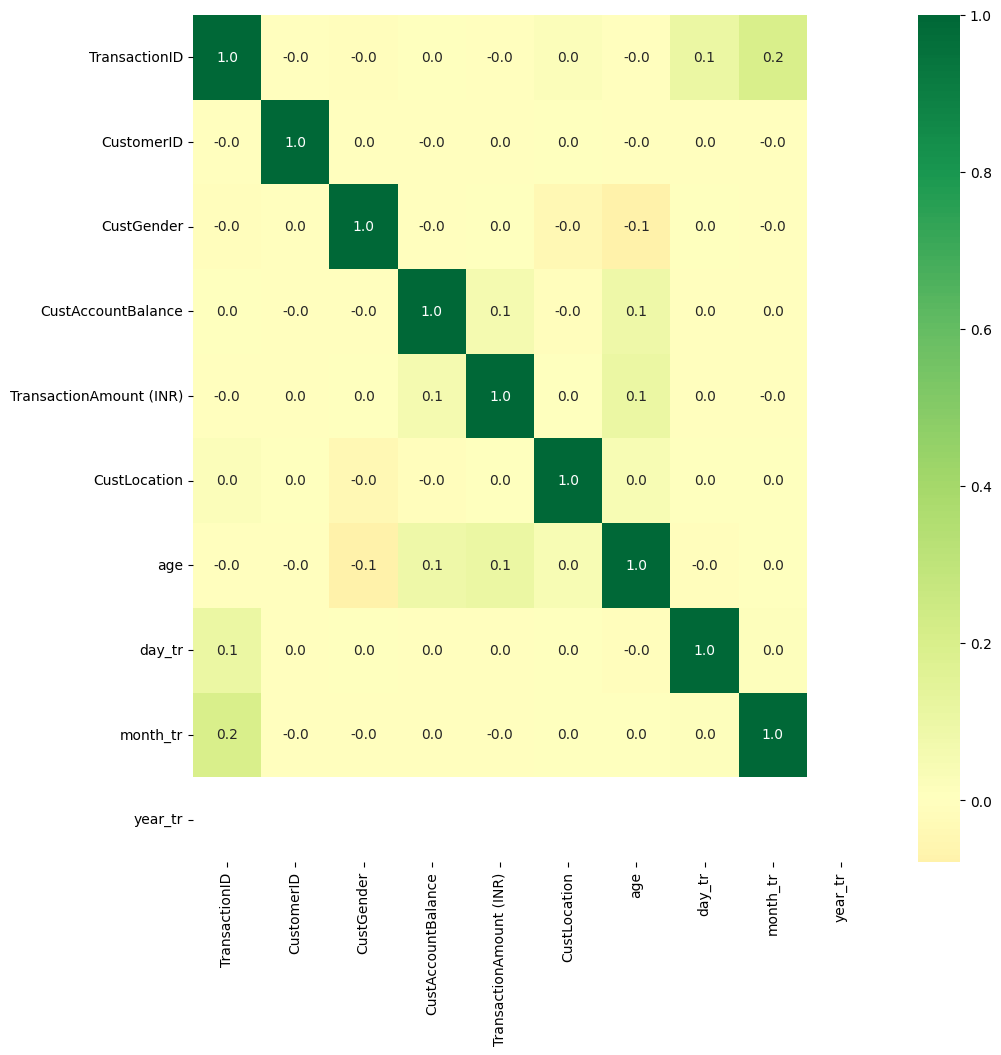

In [52]:
df.corr()
plt.figure(figsize = (11, 11))
sns.heatmap(df.corr(), cmap='RdYlGn', center=0, annot=True, fmt=".1f")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

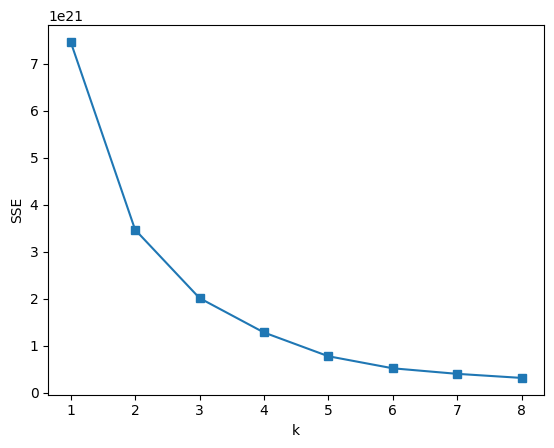

In [67]:
# метод локтя
X = df.loc[:,['age','CustAccountBalance', 'month_tr', 'year_tr', 'CustGender', 'day_tr']]

SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [68]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [69]:
kmeans.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

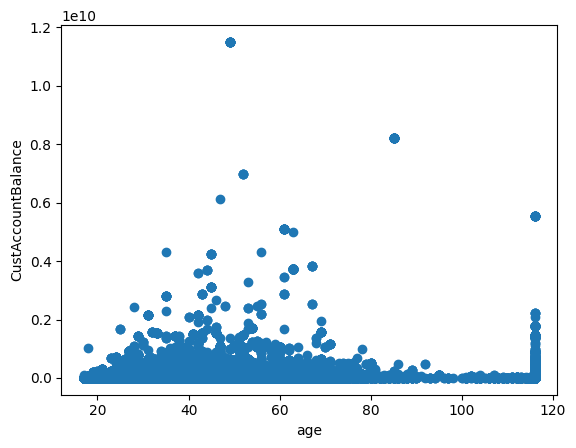

In [70]:
import matplotlib.pyplot as plt

plt.scatter(df['age'],df['CustAccountBalance'])
plt.xlabel('age')
plt.ylabel('CustAccountBalance')
plt.show()

In [71]:
X['cluster'] = Y_pred
X

,age,CustAccountBalance,month_tr,year_tr,CustGender,day_tr,cluster
0,22,1781905,2,2016,1,1,0
1,59,227069,2,2016,0,1,0
2,20,1787443,2,2016,1,1,0
3,43,86650321,2,2016,1,1,4
4,28,671443,2,2016,1,1,0
...,...,...,...,...,...,...,...
1048562,26,763519,9,2016,0,6,0
1048563,24,2731142,9,2016,0,6,0
1048564,27,22175706,9,2016,0,6,0
1048565,38,1011787,9,2016,0,6,0


In [72]:
X[X['cluster']==0]

,age,CustAccountBalance,month_tr,year_tr,CustGender,day_tr,cluster
0,22,1781905,2,2016,1,1,0
1,59,227069,2,2016,0,1,0
2,20,1787443,2,2016,1,1,0
4,28,671443,2,2016,1,1,0
5,44,5360920,2,2016,1,1,0
...,...,...,...,...,...,...,...
1048562,26,763519,9,2016,0,6,0
1048563,24,2731142,9,2016,0,6,0
1048564,27,22175706,9,2016,0,6,0
1048565,38,1011787,9,2016,0,6,0


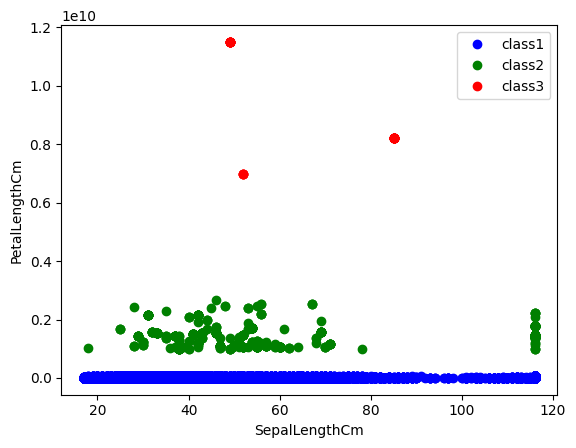

In [59]:
import matplotlib.pyplot as plt

# X[строки, столбцы]
# plt.plot(x,y)
plt.plot(X[X['cluster']==0]['age'], X[X['cluster']==0]['CustAccountBalance'], 'bo', label='class1')

plt.plot(X[X['cluster']==1]['age'], X[X['cluster']==1]['CustAccountBalance'], 'go', label='class2')

plt.plot(X[X['cluster']==2]['age'], X[X['cluster']==2]['CustAccountBalance'], 'ro', label='class3')

plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend(loc=0)
plt.show()

In [77]:
# X=X.drop("cluster", axis=1)
X=X.loc[:1000]

In [80]:
X

,age,CustAccountBalance,month_tr,year_tr,CustGender,day_tr
0,22,1781905,2,2016,1,1
1,59,227069,2,2016,0,1
2,20,1787443,2,2016,1,1
3,43,86650321,2,2016,1,1
4,28,671443,2,2016,1,1
...,...,...,...,...,...,...
996,26,77250325,10,2016,1,5
997,22,435618,10,2016,0,5
998,21,192,10,2016,1,5
999,28,5747729,10,2016,0,5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.9112143842941315


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.8875963874670001


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.8552231762928071


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.7697735368098968


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.7479083054937667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.7457294205410366


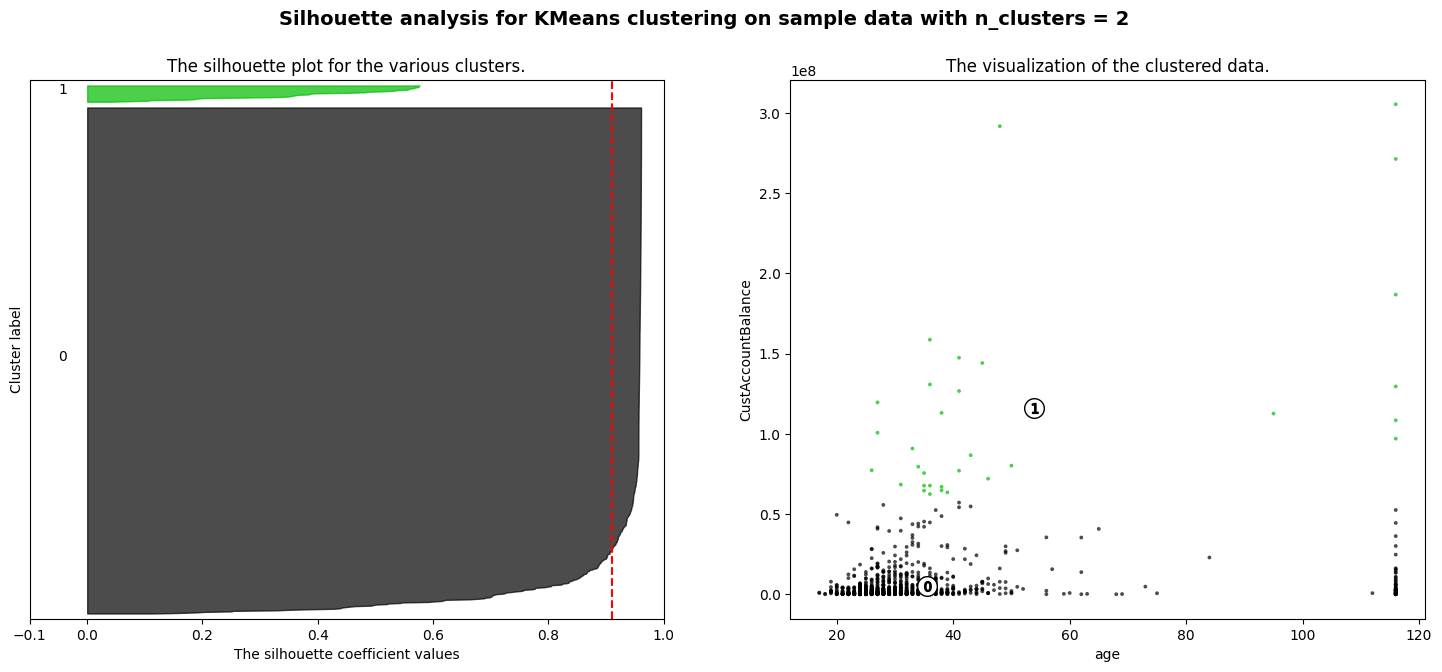

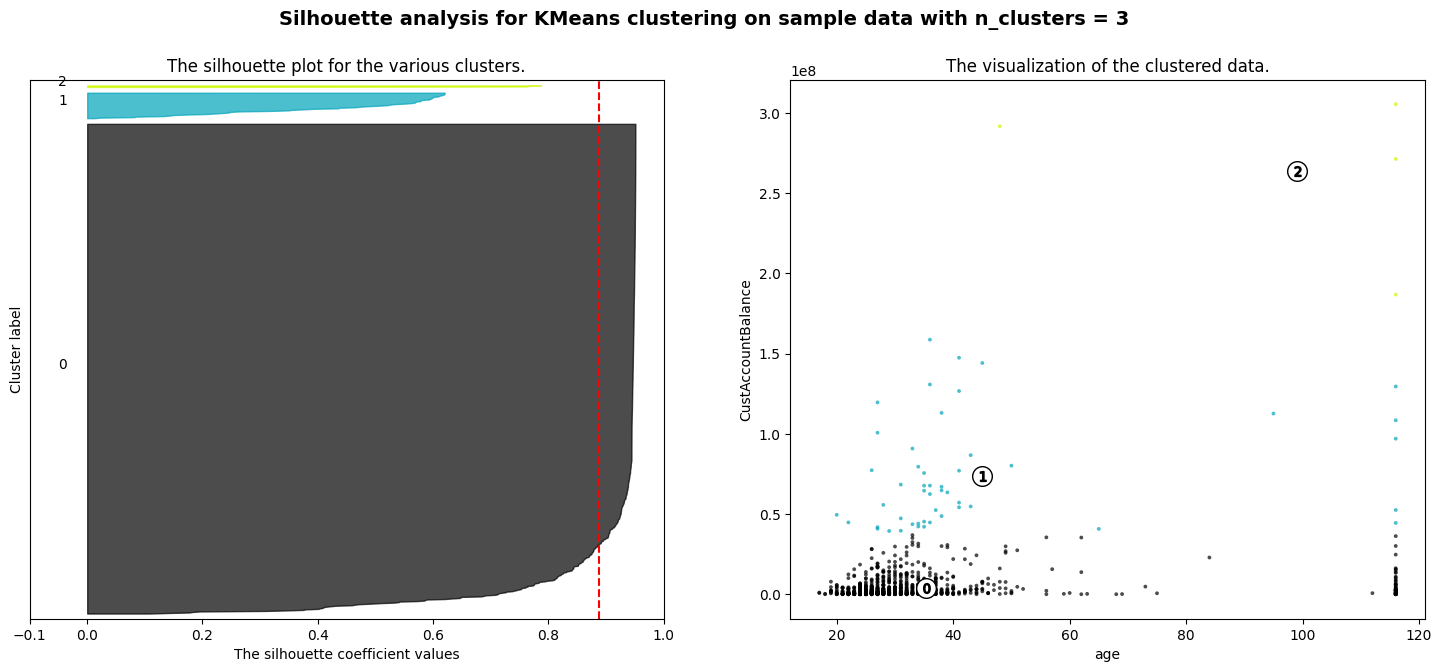

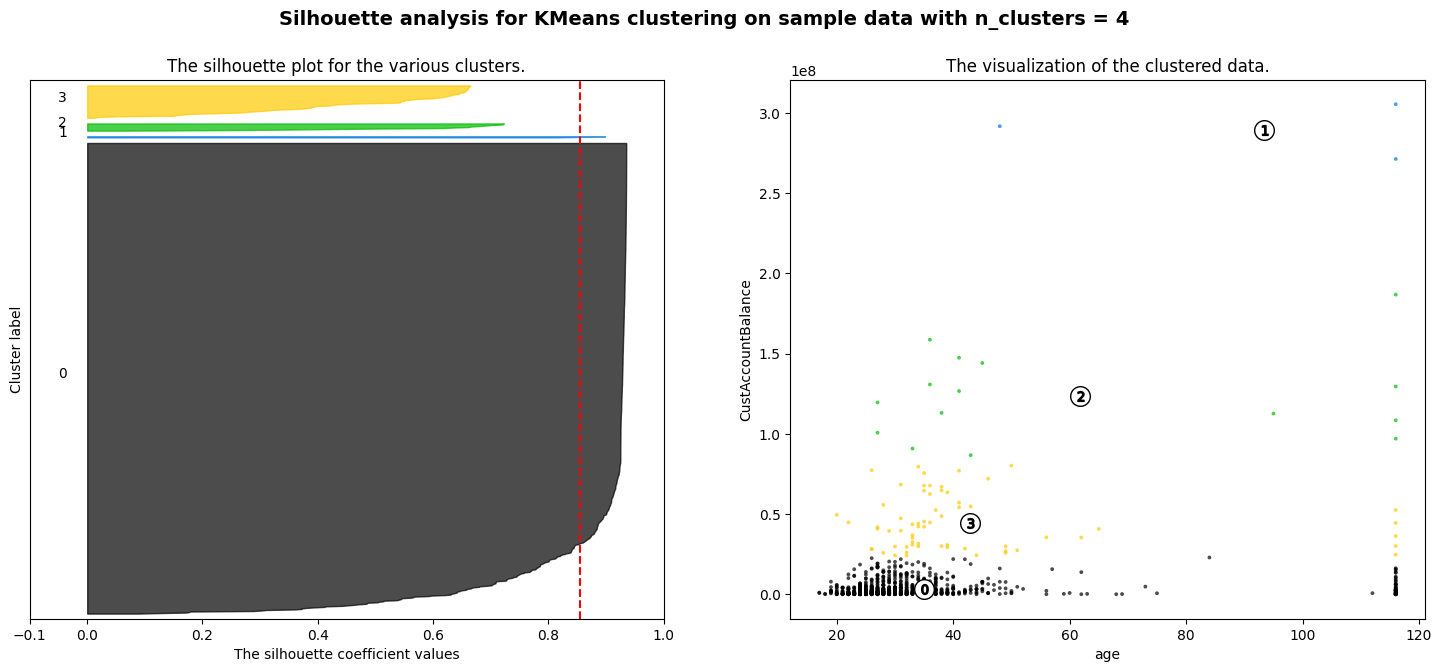

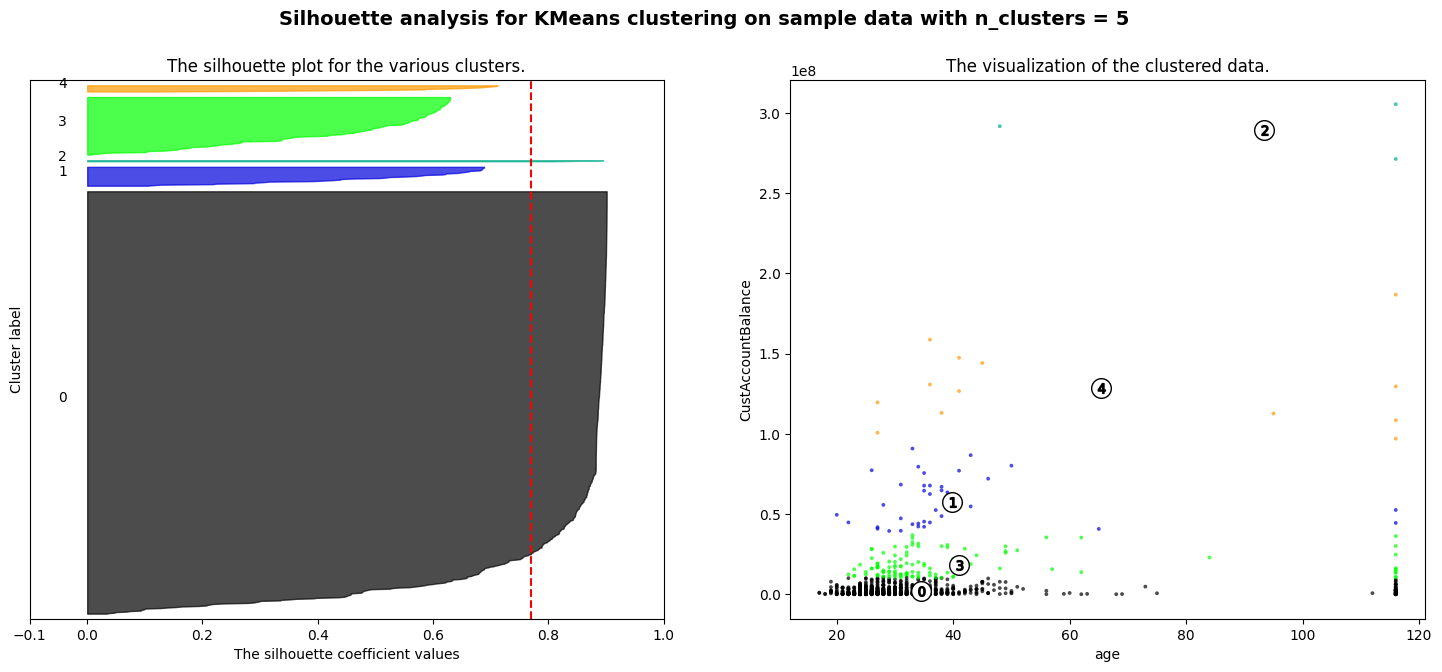

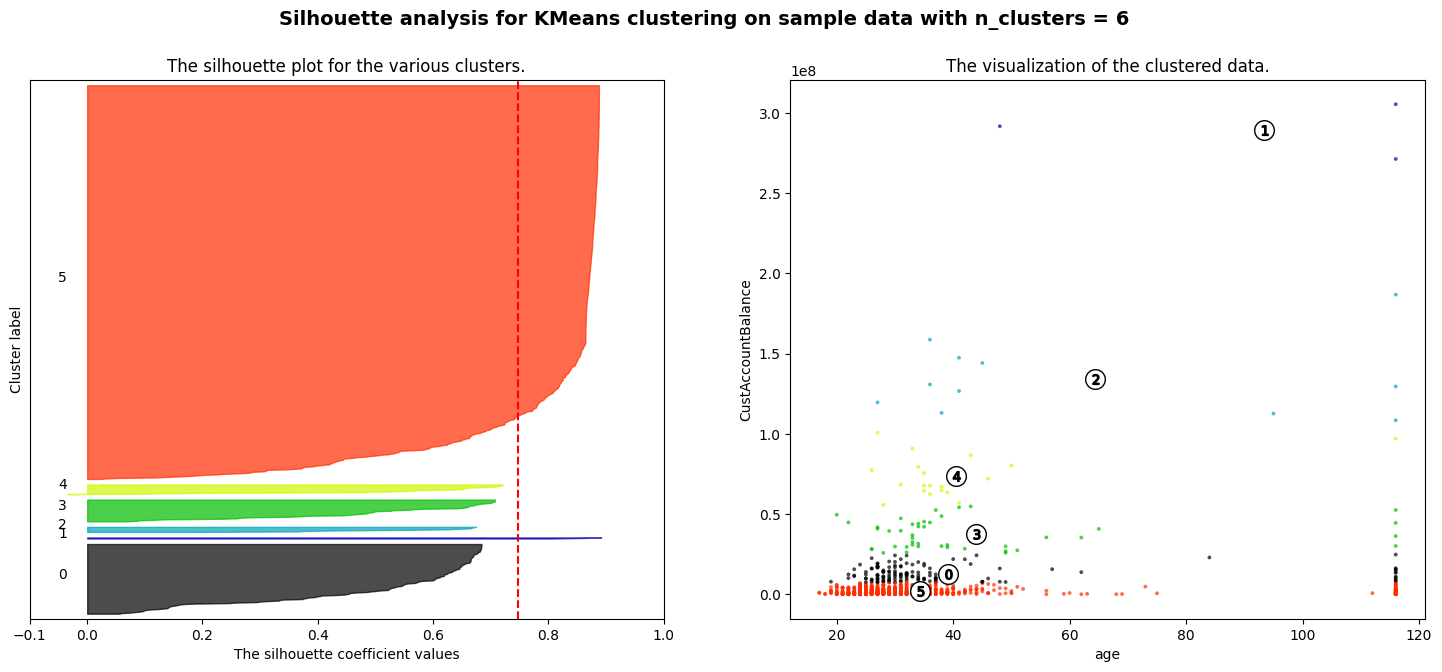

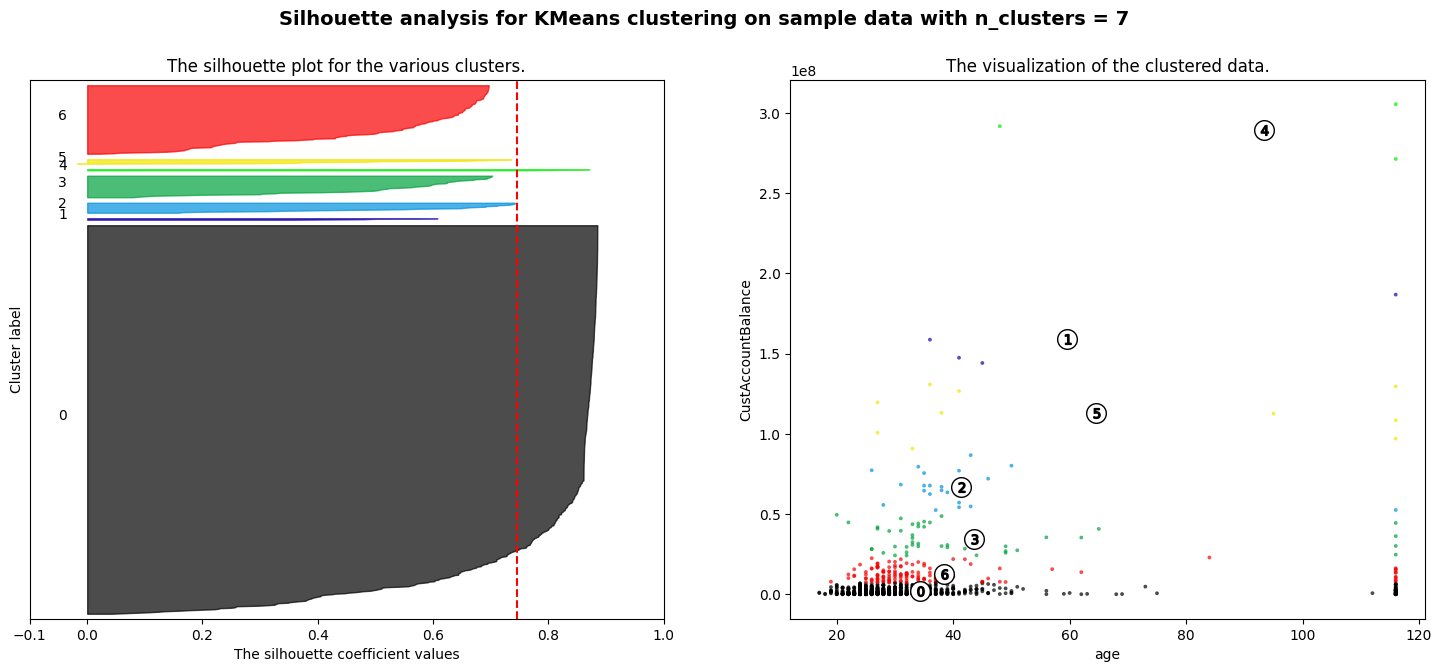

In [81]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel(X.columns[0])
    ax2.set_ylabel(X.columns[1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
fontweight="bold",
    )

plt.show()

        age  CustAccountBalance
0        94             1781905
1        57              227069
2        96             1787443
3        73            86650321
4        88              671443
...      ..                 ...
1048562  90              763519
1048563  92             2731142
1048564  89            22175706
1048565  78             1011787
1048566  84             7573442

[1041613 rows x 2 columns]


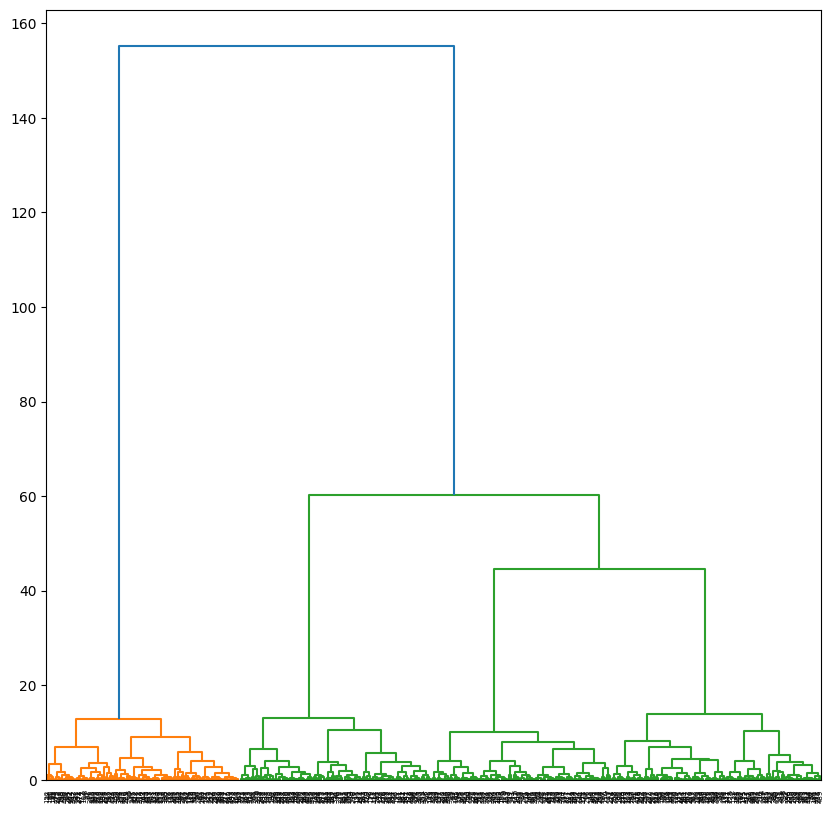

In [ ]:
x=df.loc[:, ['age', 'CustAccountBalance']]
print(x)
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# матрица расстояний
Z = linkage(X, 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [ ]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X, method='average', metric='euclidean')
Z[0]

array([2.27000000e+02, 4.15000000e+02, 9.52638789e-03, 2.00000000e+00])

In [ ]:
Z[120]

array([1.55000000e+02, 6.15000000e+02, 1.39111961e-01, 5.00000000e+00])

In [ ]:
from scipy.cluster.hierarchy import fcluster

# fcluster - метод разбиения на кластеры
# принимает на вход: матрицу расстояний
# критерий разделения на кластеры
y_pred = fcluster(Z, 4, criterion='distance')
# label = fcluster(Z, n_clusters=5, criterion='n_clusters')

np.unique(y_pred)
# обратите внимание что в отличии kmeans или AgglomerativeClustering
# нумерация кластеров с 1
df['pred'] = y_pred
df

ValueError: Length of values (500) does not match length of index (1041613)

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(df.loc[label==1, 'age'], df.loc[label==1, 'CustAccountBalance'], s=50, marker='o', color='red')
plt.scatter(df.loc[label==2, 'age'], df.loc[label==2, 'CustAccountBalance'], s=50, marker='o', color='blue')
plt.scatter(df.loc[label==3, 'age'], df.loc[label==3, 'CustAccountBalance'], s=50, marker='o', color='green')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Создаем модель
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', distance_threshold = 10)

y_hc = hc.fit_predict(X)
# hc.fit(X)
# hc.predict(X)

y_hc
# scipy - 1,2,3
# sklearn - 0,1,2

In [ ]:
df['pred_sklearn'] = y_hc
df

In [ ]:
plt.scatter(X.loc[y_hc==0, 'age'], X.loc[y_hc==0, 'CustAccountBalance'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'age'], X.loc[y_hc==1, 'CustAccountBalance'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'age'], X.loc[y_hc==2, 'CustAccountBalance'], s=50, marker='o', color='green')

plt.show()

In [ ]:
df

NameError: name 'df' is not defined